### Import packages

In [33]:
# Scientific computing
import numpy as np

# Visualisation
import matplotlib.pyplot as plt

# data structure
import pandas as pd

# Import the storage tank Class
from cryoevap.storage_tanks import Tank

# Import Cryogen class
from cryoevap.cryogens import Cryogen

### Define all Variables

In [37]:
# Cylindrical storage tank properties
Q_roof = 0 # Roof heat ingress / W
T_air = 298.15 # Temperature of the environment K

# Set overall heat transfer coefficient through the walls for liquid and vapour
U_L = 3e-3 # W/m2/K
U_V = 3e-3 # W/m2/K

# Specify wall heat partitioning fraction
eta_w= 0.9

# Specify tank operating pressure
P = 100000 # Pa

### Variables of interest

# Vertically orientated cylindrical tank volume
V_tank = 2033 #m^3 | values of 80, 2033 and 165000

# Initial liquid filling / Dimensionless
LF = 0.95 # values of 0.95, 0.80 and 0.30

# especify compound in the tank
Compound = "methane" # hydrogen, methane, ammonia, nitrogen

# Especify if the data should be saved in the output.xlxs excel
sv = True

In [38]:
# Define evaporation time to simulate
hours = 24 * 7
evap_time = 3600 * hours

# Thickness of the in % of the internal diameter
ST = 1.02

# Show sim duration
print(f"Simulation time: {hours} h")

Simulation time: 168 h


In [39]:
from scipy.optimize import Bounds, minimize

# Minimum and maximum practical ranges
# of the aspect ratio
bounds = Bounds([0.1], [10])

# Define objective function
def BOR_function(a):
    # Update aspect ratio
    # Calculate internal diameter
    d_i = ((4 * V_tank)/(np.pi * a))**(1/3) # internal diameter / m
    d_o = d_i * ST # external diameter / m
    
    # Initialize tank
    mid_tank = Tank(d_i, d_o, V_tank, LF)

    # Set cryogen
    mid_tank.cryogen = Cryogen(name = Compound)
    
    mid_tank.cryogen.set_coolprops(P)

    q_b = U_L*(T_air-mid_tank.cryogen.T_sat) # flux de calor proporcional a la diferencia de temperatura del liquido criogenico.
    
    Q_b=q_b*mid_tank.A_T
    
    mid_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b, Q_roof, eta_w)

    mid_tank.U_roof = U_V
    
    
    
    # Define vertical spacing
    # dz = 0.05 # 0.1 0.01 0.001
    # Calculate number of nodes
    
    # n_z = 1 + int(np.round(mid_tank.l_V/dz, 0))

    n_z = 30
    # Define dimensionless computational grid
    mid_tank.z_grid = np.linspace(0, 1, n_z)
    print(len(mid_tank.z_grid))
    # Execute simulation
    mid_tank.evaporate(evap_time)
    
    # Calculate BOR
    BOR = 1 - mid_tank.data['V_L'][-1] / mid_tank.data['V_L'][0]

    print("a = %.3f, BOR=%.3e" % (a, BOR))
    
    return BOR

# Initial Aspect Ratio to optimise
x0 = 1 

# Solution of the optimization 
res = minimize(BOR_function, x0, method='trust-constr',tol=1e-8 , options={'verbose': 1}, bounds=bounds)

# Calculate internal diameter for optimum
d_i = ((4 * V_tank)/(np.pi * res.x[0]))**(1/3) # internal diameter / m
d_o = d_i * ST # external diameter / m
    
# Initialize optimum tank
mid_tank = Tank(d_i, d_o, V_tank, LF)

# Set cryogen
mid_tank.cryogen = Cryogen(name = Compound)
    
mid_tank.cryogen.set_coolprops(P)

q_b = U_L*(T_air-mid_tank.cryogen.T_sat) # Heat flux proportional to the T diff of the cryogen.
    
Q_b=q_b*mid_tank.A_T
    
mid_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b, Q_roof, eta_w)

mid_tank.U_roof = U_V

# Data table

table = [[Compound, mid_tank.V, mid_tank.LF, f"{hours} hrs", f"{res.fun*100}", f"{res.x[0]}",
         P, T_air, mid_tank.d_i, mid_tank.d_o, mid_tank.l, U_L, U_V, eta_w, mid_tank.Q_b]]

# structure the data table

Data_table = pd.DataFrame(table, columns = ["Cryogen", "Volume", "Liquid Filling","Simulation","BOR","Aspect Ratio"
                                   , "Pressure (P)", "T_air (K)", "d_i", "d_o", "Height", "U_L", "U_V", "Eta_w","Q_b"])
print(Data_table)

if sv == True:
    # Send Data table to excel
    # Load the existing Excel file
    
    data_excel = pd.read_excel('output.xlsx')
    
    # Append the row
    data_excel = pd.concat([data_excel, Data_table], ignore_index=True)
    
    # Save the updated DataFrame back to the Excel file
    data_excel.to_excel('output.xlsx', index=False)
else:
    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^\nData was not saved.\n^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")
# Print a summary of the optimum if it is found
if res.success:
   print(f"\nOptimum found for Tank Volume: {V_tank}, Liquid Filling: {LF*100}%, Compound: {Compound}" + f"\nAspect Ratio = {res.x[0]:.3f}" + f"\nBOR = {res.fun*100:.3f} %")

30


/tmp/ipykernel_1825/3430765509.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("a = %.3f, BOR=%.3e" % (a, BOR))


a = 1.000, BOR=6.223e-04
30
a = 1.000, BOR=6.223e-04
30
a = 1.078, BOR=6.265e-04
30
a = 1.078, BOR=6.265e-04
30
a = 0.662, BOR=6.165e-04
30
a = 0.662, BOR=6.165e-04
30
a = 0.857, BOR=6.165e-04
30
a = 0.857, BOR=6.165e-04
30
a = 0.802, BOR=6.153e-04
30
a = 0.802, BOR=6.153e-04
30
a = 0.752, BOR=6.149e-04
30
a = 0.752, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149e-04
30
a = 0.753, BOR=6.149

In [5]:
# Send Data table to excel
# Load the existing Excel file
    
data_excel = pd.read_excel('output.xlsx')
    
# Append the row
data_excel = pd.concat([data_excel, Data_table], ignore_index=True)
    
# Save the updated DataFrame back to the Excel file
data_excel.to_excel('output.xlsx', index=False)

In [8]:
#Boil-off ratio list for plotting
BOR_plot = []

# Generate aspect ratio range
AR = np.linspace(0.4,2.1,30)
# Generate tanks in Aspect Ratio range
for a in AR:
    # Update aspect ratio
    # Calculate internal diameter
    d_i = ((4 * V_tank)/(np.pi * a))**(1/3) # internal diameter / m
    d_o = d_i * ST # external diameter / m
    
    # Initialize tank
    mid_tank = Tank(d_i, d_o, V_tank, LF)

    # Set cryogen
    mid_tank.cryogen = Cryogen(name = Compound)
    
    mid_tank.cryogen.set_coolprops(P)
    

    q_b = U_L*(T_air-mid_tank.cryogen.T_sat) # Heat flux proportional to the T diff of the cryogen.
    
    Q_b=q_b * mid_tank.A_T
    
    mid_tank.set_HeatTransProps(U_L, U_V, T_air, Q_b, Q_roof, eta_w)

    mid_tank.U_roof = U_V
    
    
    
    # Define vertical spacing
    # dz = 0.1

    # Calculate number of nodes
    # n_z = 1 + int(np.round(mid_tank.l_V/dz, 0))
    n_z = 10
    # Define dimensionless computational grid
    mid_tank.z_grid = np.linspace(0, 1, n_z)
    print(len(mid_tank.z_grid))
    # Execute simulation
    mid_tank.evaporate(evap_time)
    
    # Calculate BOR
    BOR = 1 - mid_tank.data['V_L'][-1] / mid_tank.data['V_L'][0]
    
    # Save BOR value
    BOR_plot.append(BOR*100)
    
    print("a = %.3f, BOR=%.3e" % (a, BOR))
    # print("BOR = %.3f %% | B_l = %.3f " % (BOR * 100, mid_tank.b_l_dot))
    # print(f"Aspect Ratio:{a:.3f}, Altura: {mid_tank.l:.3f} , Diametro interno:{mid_tank.d_i:.3f}, Volumen:{mid_tank.V} \n")
print("Simulation end")

10
a = 0.400, BOR=1.836e-05
10
a = 0.459, BOR=1.823e-05
10
a = 0.517, BOR=1.819e-05
10
a = 0.576, BOR=1.820e-05
10
a = 0.634, BOR=1.825e-05
10
a = 0.693, BOR=1.832e-05
10
a = 0.752, BOR=1.841e-05
10
a = 0.810, BOR=1.852e-05
10
a = 0.869, BOR=1.864e-05
10
a = 0.928, BOR=1.877e-05
10
a = 0.986, BOR=1.890e-05
10
a = 1.045, BOR=1.904e-05
10
a = 1.103, BOR=1.918e-05
10
a = 1.162, BOR=1.932e-05
10
a = 1.221, BOR=1.946e-05
10
a = 1.279, BOR=1.960e-05
10
a = 1.338, BOR=1.975e-05
10
a = 1.397, BOR=1.989e-05
10
a = 1.455, BOR=2.004e-05
10
a = 1.514, BOR=2.018e-05
10
a = 1.572, BOR=2.032e-05
10
a = 1.631, BOR=2.047e-05
10
a = 1.690, BOR=2.061e-05
10
a = 1.748, BOR=2.075e-05
10
a = 1.807, BOR=2.089e-05
10
a = 1.866, BOR=2.103e-05
10
a = 1.924, BOR=2.116e-05
10
a = 1.983, BOR=2.130e-05
10
a = 2.041, BOR=2.143e-05
10
a = 2.100, BOR=2.157e-05
Simulation end


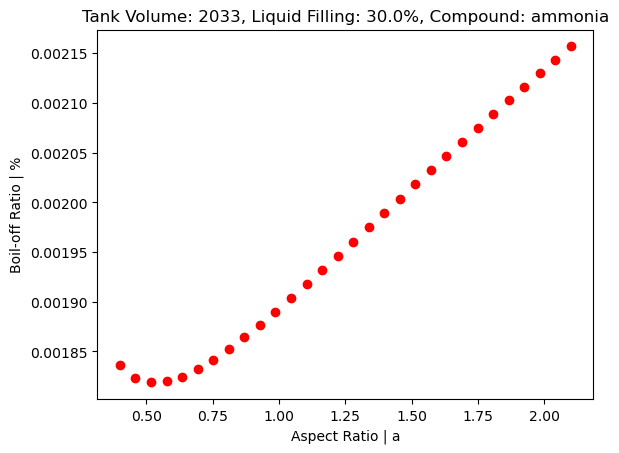

In [9]:
# Create a plot
plt.plot(AR, BOR_plot,"ro")

# Add labels and title
plt.xlabel('Aspect Ratio | a')
plt.ylabel('Boil-off Ratio | %')
plt.title(f'Tank Volume: {V_tank}, Liquid Filling: {LF*100}%, Compound: {Compound}')


# Save the plot
plt.savefig(f'{Compound}/V_{V_tank}_LF_{LF*100}_C_{Compound}_nvmr.png')

# Display the plot
plt.show()